# 1) Importing Libraries and Data Reading 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("Churn_Modelling (1).csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 2) Removing irrelevant Columns

In [7]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
data.drop(columns=['RowNumber','CustomerId', 'Surname'], inplace=True)

In [9]:
data.shape

(10000, 11)

#  3) Exploratory Data Analysis (E.D.A.)

In [10]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


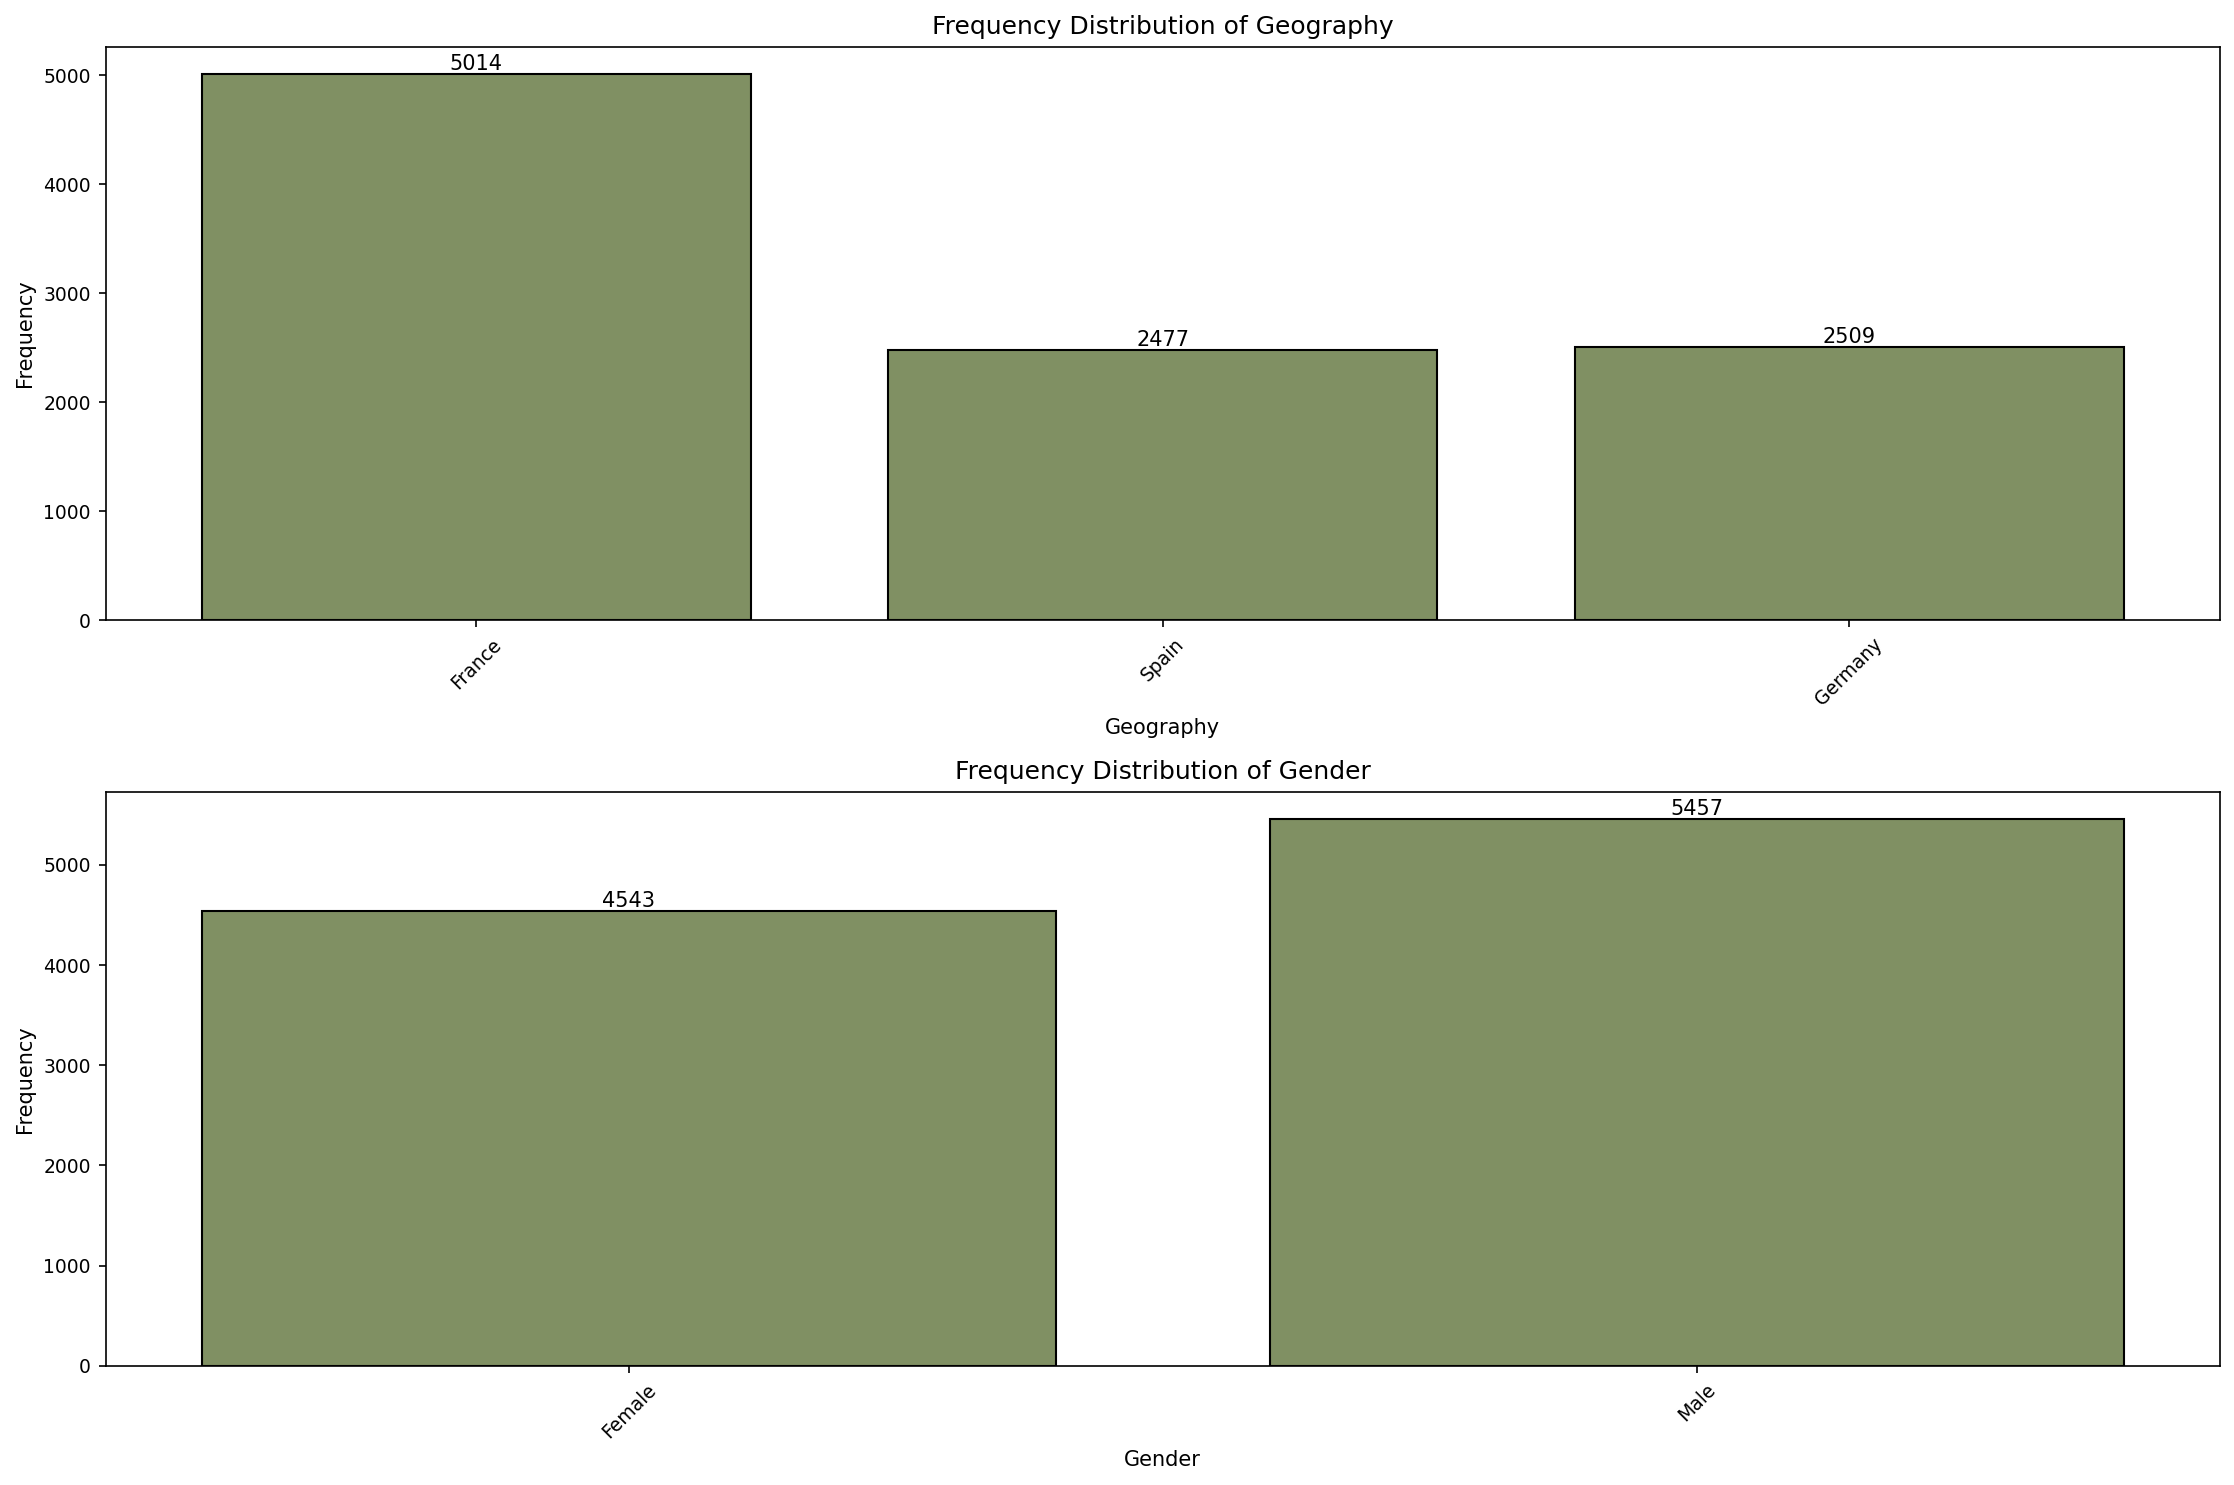

In [11]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(15, len(categorical_columns) * 5), dpi=150)  # Adjust figure size dynamically

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)  # Create subplots for each categorical column
    chart = sns.histplot(data=data, x=column, color='DarkOliveGreen', shrink=0.8)  # Shrink bars slightly for better spacing
    chart.bar_label(chart.containers[0], size=10)  # Annotate bar labels
    plt.title(f"Frequency Distribution of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(rotation=45, fontsize=9)  # Rotate x-ticks for better readability
    plt.yticks(fontsize=9)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


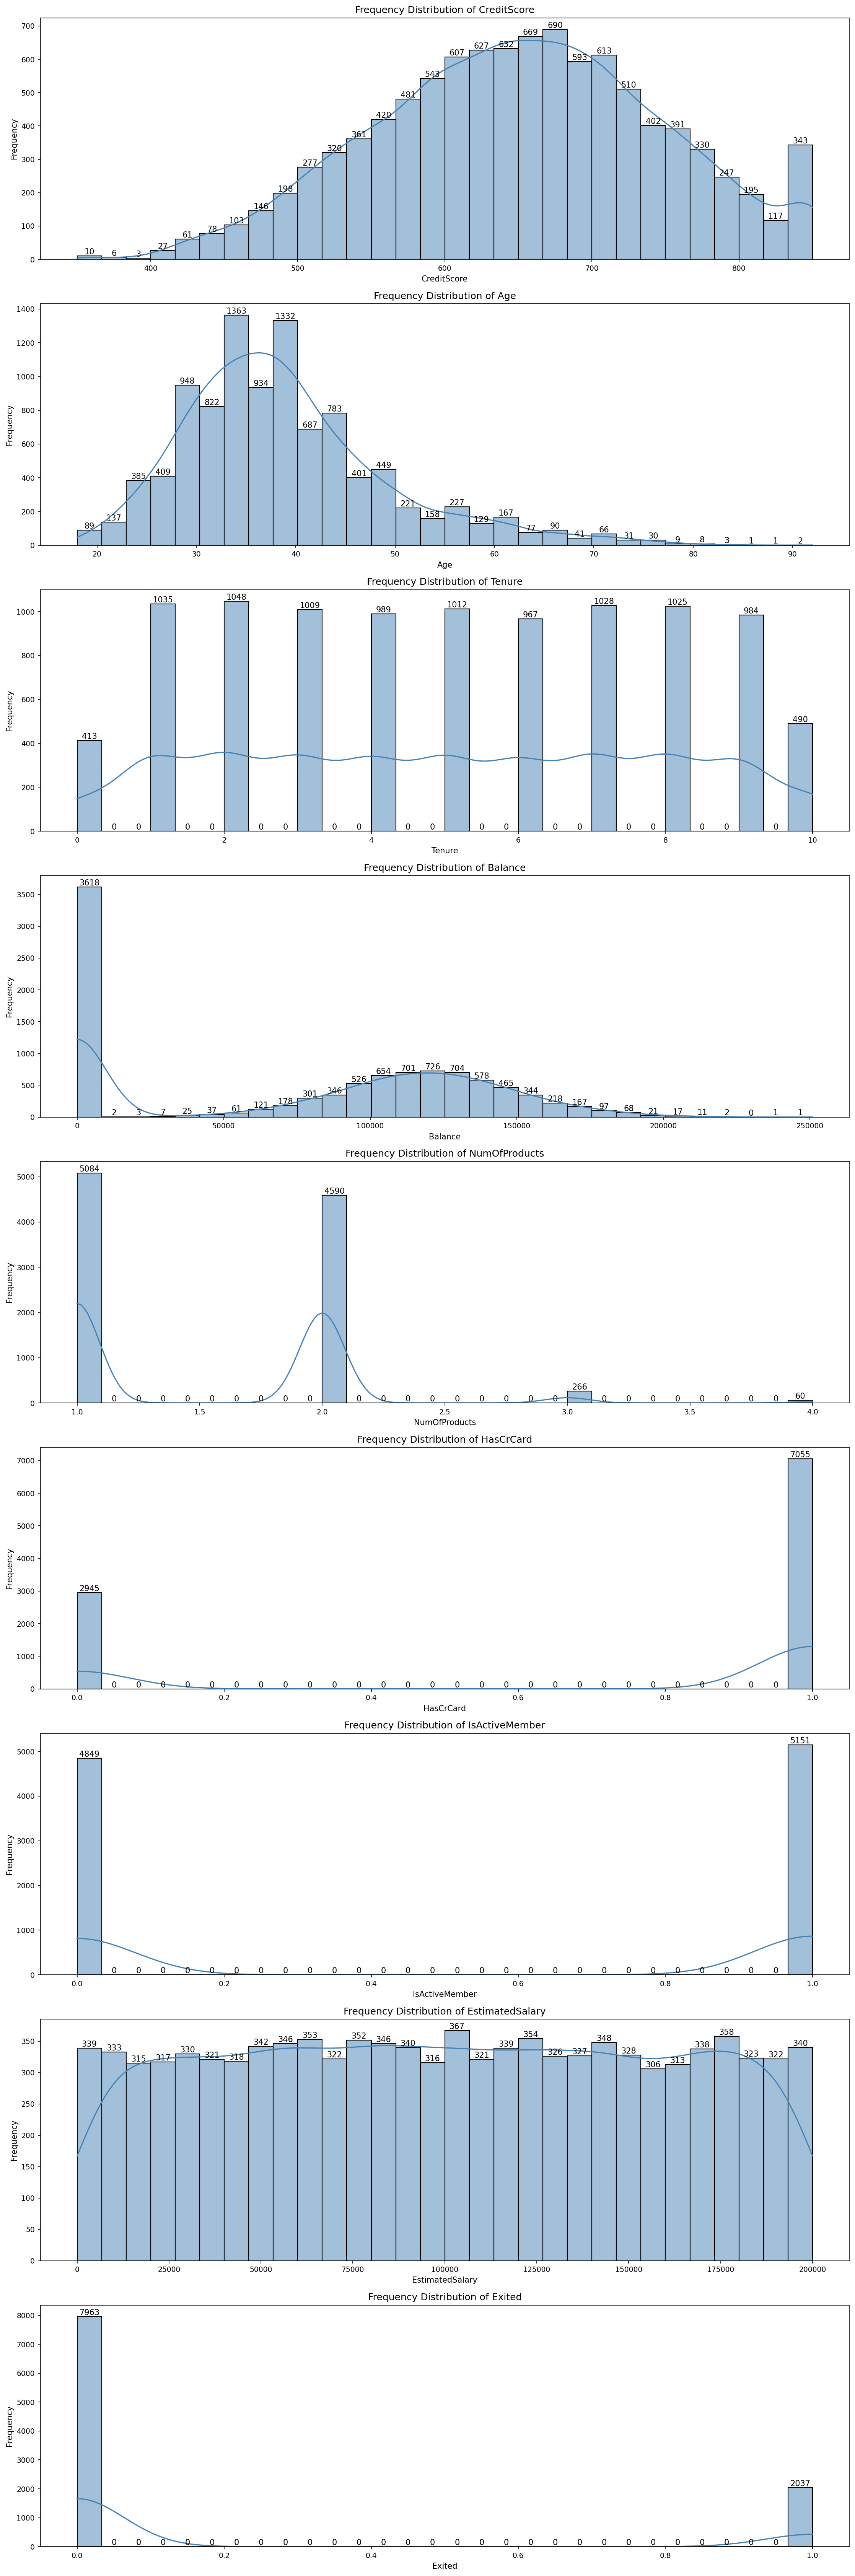

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns from the data
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Set figure size dynamically
plt.figure(figsize=(15, len(numerical_columns) * 5), dpi=150)

# Loop through numerical columns to create histograms and KDE plots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)  # Create subplots for each numerical column
    chart = sns.histplot(data=data, x=column, kde=True, color='SteelBlue', bins=30)  # KDE curve and histogram
    chart.bar_label(chart.containers[0], size=10)  # Annotate bars with frequency counts
    
    # Set title and labels
    plt.title(f"Frequency Distribution of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    
    # Adjust font sizes for x and y ticks
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


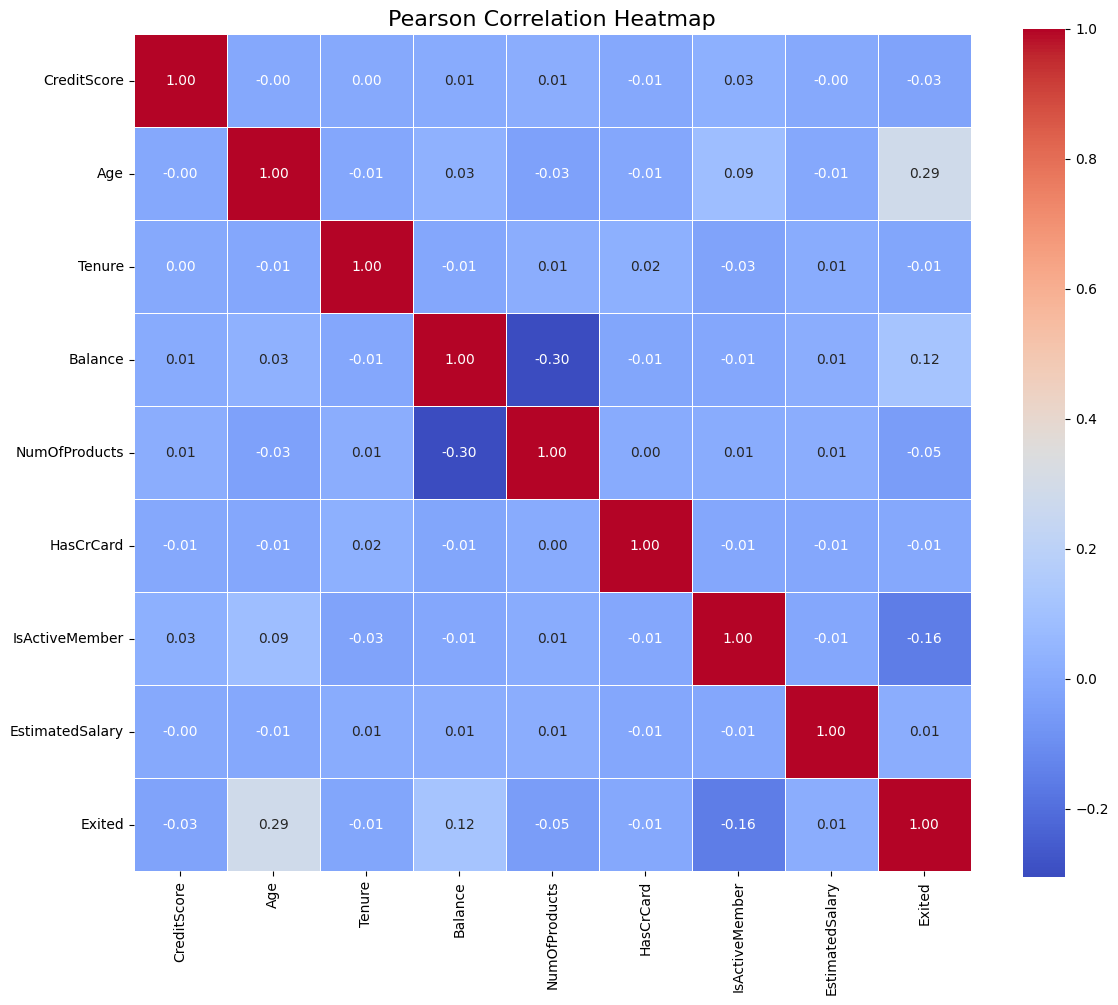

In [13]:
# Select numerical columns and calculate the correlation matrix
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(12, 10))

# Use a predefined colormap like 'coolwarm'
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5, 
    cbar=True, 
    square=True
)

# Define the bounds for the color bins
bounds = [-1, -0.8, -0.2, 0.2, 0.8, 1]
norm = mpl.colors.BoundaryNorm(bounds, ncolors=256)

# Add a title
plt.title("Pearson Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


# 4) Outlier Analysis and Removing

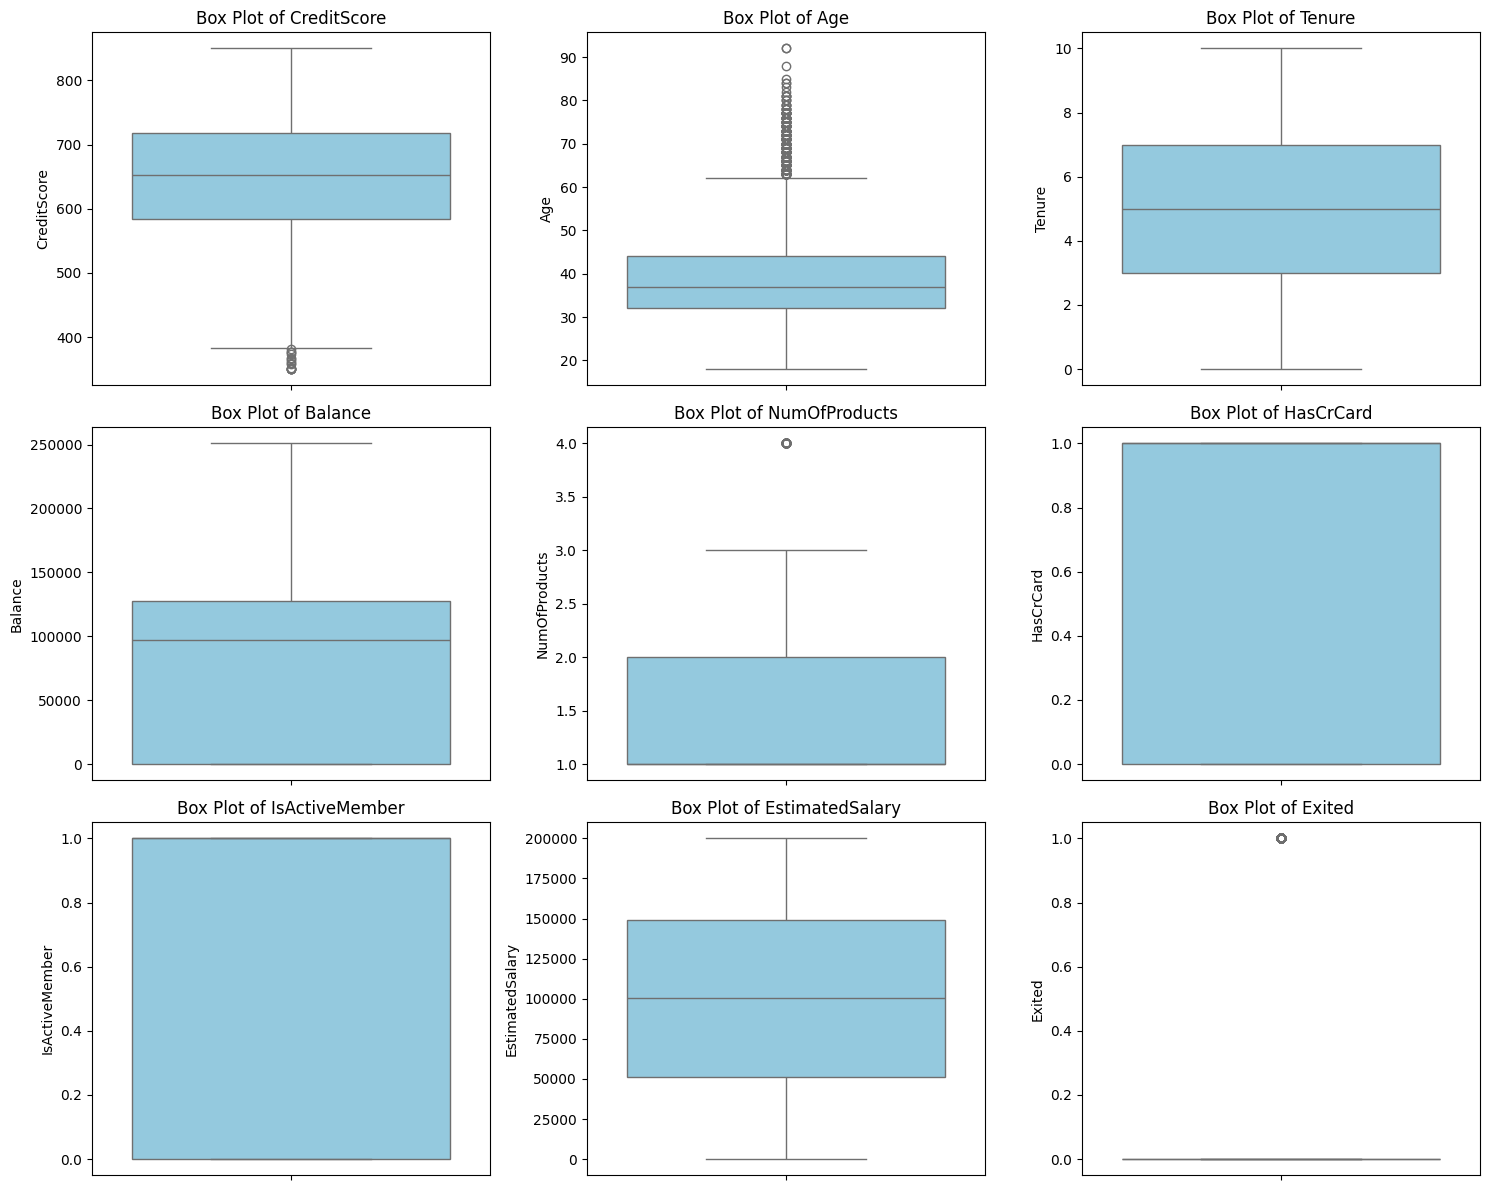

In [14]:
# List of numerical features for box plots
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Set up the plotting
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on the number of features
    sns.boxplot(data=data, y=feature, color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [15]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary' , 'Exited']
outlier_data = []

for feature in features:
    Q1 = data[feature].quantile(0.25)  # 25th Percentile
    Q3 = data[feature].quantile(0.75)  # 75th Percentile
    IQR = Q3 - Q1                   # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR    # Lower threshold
    upper_bound = Q3 + 1.5 * IQR    # Upper threshold
    
    outliers_count = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].shape[0]
    outlier_data.append({
        'Feature': feature,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outliers_Count': outliers_count
    })
outlier_info = pd.DataFrame(outlier_data)
print(outlier_info)


           Feature   Lower_Bound   Upper_Bound  Outliers_Count
0      CreditScore     383.00000     919.00000              15
1              Age      14.00000      62.00000             359
2           Tenure      -3.00000      13.00000               0
3          Balance -191466.36000  319110.60000               0
4    NumOfProducts      -0.50000       3.50000              60
5        HasCrCard      -1.50000       2.50000               0
6   IsActiveMember      -1.50000       2.50000               0
7  EstimatedSalary  -96577.09625  296967.45375               0
8           Exited       0.00000       0.00000            2037


<Axes: xlabel='Exited', ylabel='Count'>

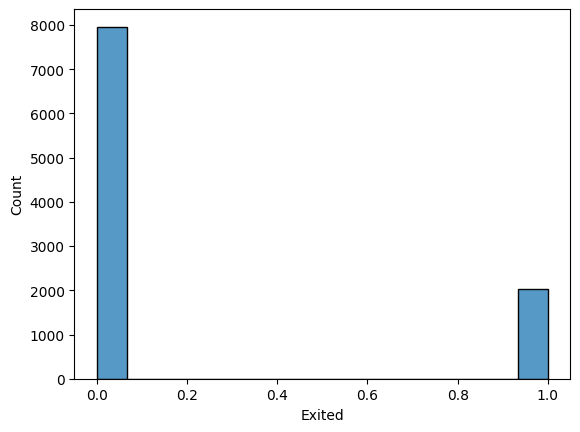

In [16]:
sns.histplot(data['Exited'])

In [17]:
count = data['NumOfProducts'].value_counts(4.0,0)
print(count*10000)
len(data)

NumOfProducts
1    5084.0
3     266.0
2    4590.0
4      60.0
Name: proportion, dtype: float64


10000

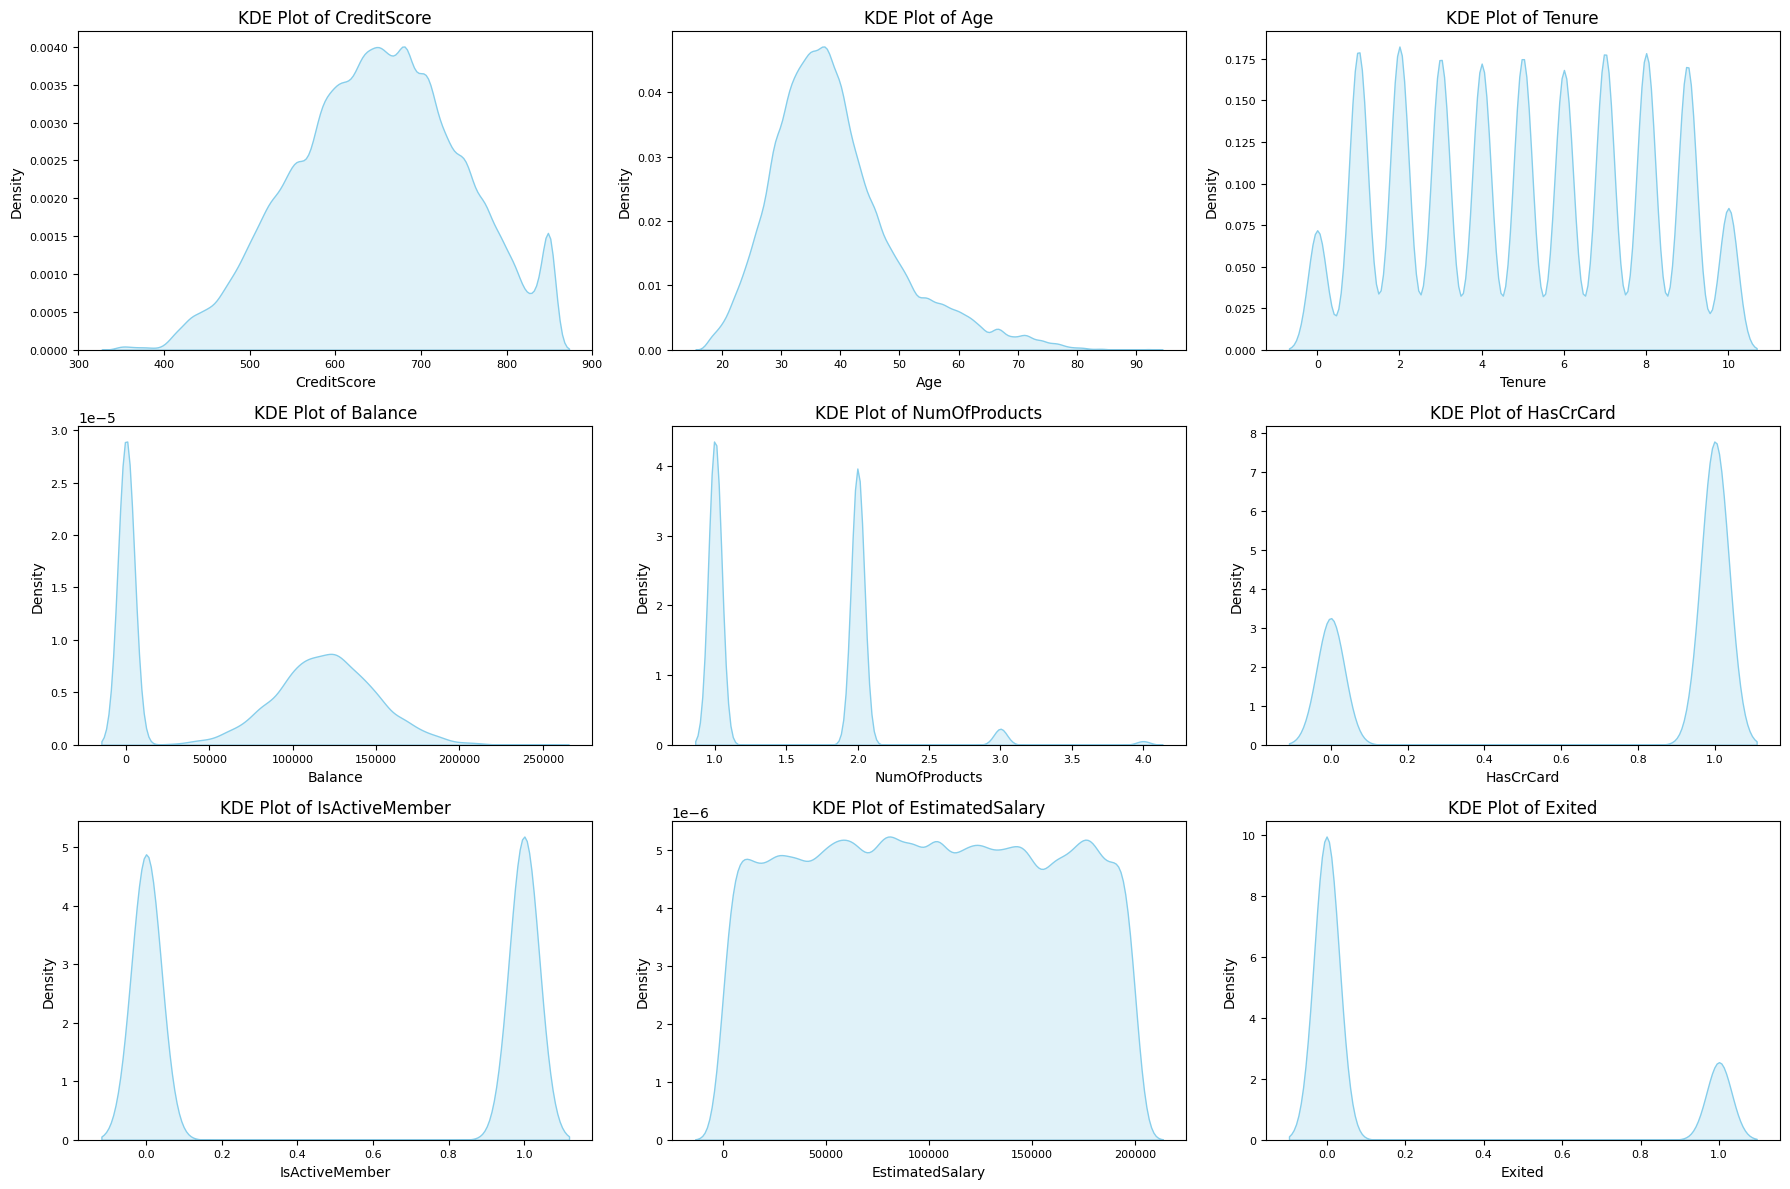

In [18]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

plt.figure(figsize=(18, 12))  
for i, feature in enumerate(features, 1):  # Start enumeration from 1
    plt.subplot(3, 3, i)  # 3 rows, 3 columns, position `i`
    sns.kdeplot(data[feature], shade=True, color='skyblue', bw_adjust=0.5)
    plt.title(f'KDE Plot of {feature}', fontsize=12)  # Adjusted font size for title
    plt.xlabel(feature, fontsize=10)  # X-axis label
    plt.ylabel("Density", fontsize=10)  # Y-axis label
    plt.xticks(fontsize=8)  # Adjust font size of x-ticks
    plt.yticks(fontsize=8)  # Adjust font size of y-ticks

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [19]:
q1 = data['Age'].quantile(0.25)  
q3 = data['Age'].quantile(0.75)   
q1,q3

(32.0, 44.0)

In [20]:
IQR = q3 - q1                  
min_range = q1 - 1.5 * IQR   
max_range = q3 + 1.5 * IQR   
min_range,max_range

(14.0, 62.0)

In [21]:
min_range, max_range = 14.0, 62.0
data = data[(data["Age"] >= min_range) & (data["Age"] <= max_range)]
data.shape

(9641, 11)

<Axes: ylabel='Age'>

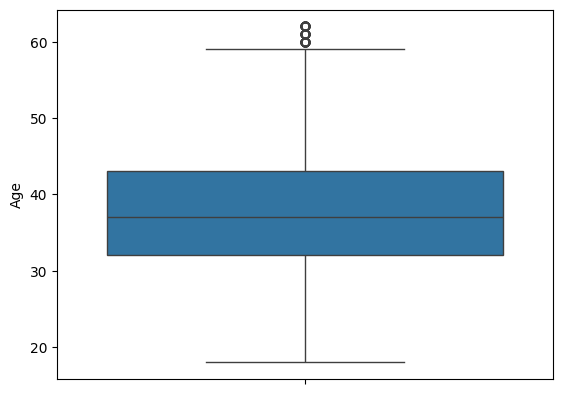

In [22]:
sns.boxplot(data["Age"])

In [23]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000
mean,650.287626,37.791723,5.015351,76560.672538,1.530962,0.705217,0.503164,100172.421223,0.203713
std,96.691920,8.803124,2.888878,62401.698405,0.581617,0.455969,0.500016,57512.265414,0.402779
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51113.140000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100324.010000,0.000000
75%,717.000000,43.000000,7.000000,127660.460000,2.000000,1.000000,1.000000,149458.730000,0.000000
max,850.000000,62.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Feature Scaling (Only Nature Checking)

In [24]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaled_features = ms.fit_transform(data[features_to_scale])
scaled_column_names = [feature + '_ms' for feature in features_to_scale]
data[scaled_column_names] = scaled_features
print(data.columns)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'CreditScore_ms', 'Age_ms', 'Tenure_ms', 'Balance_ms',
       'EstimatedSalary_ms'],
      dtype='object')


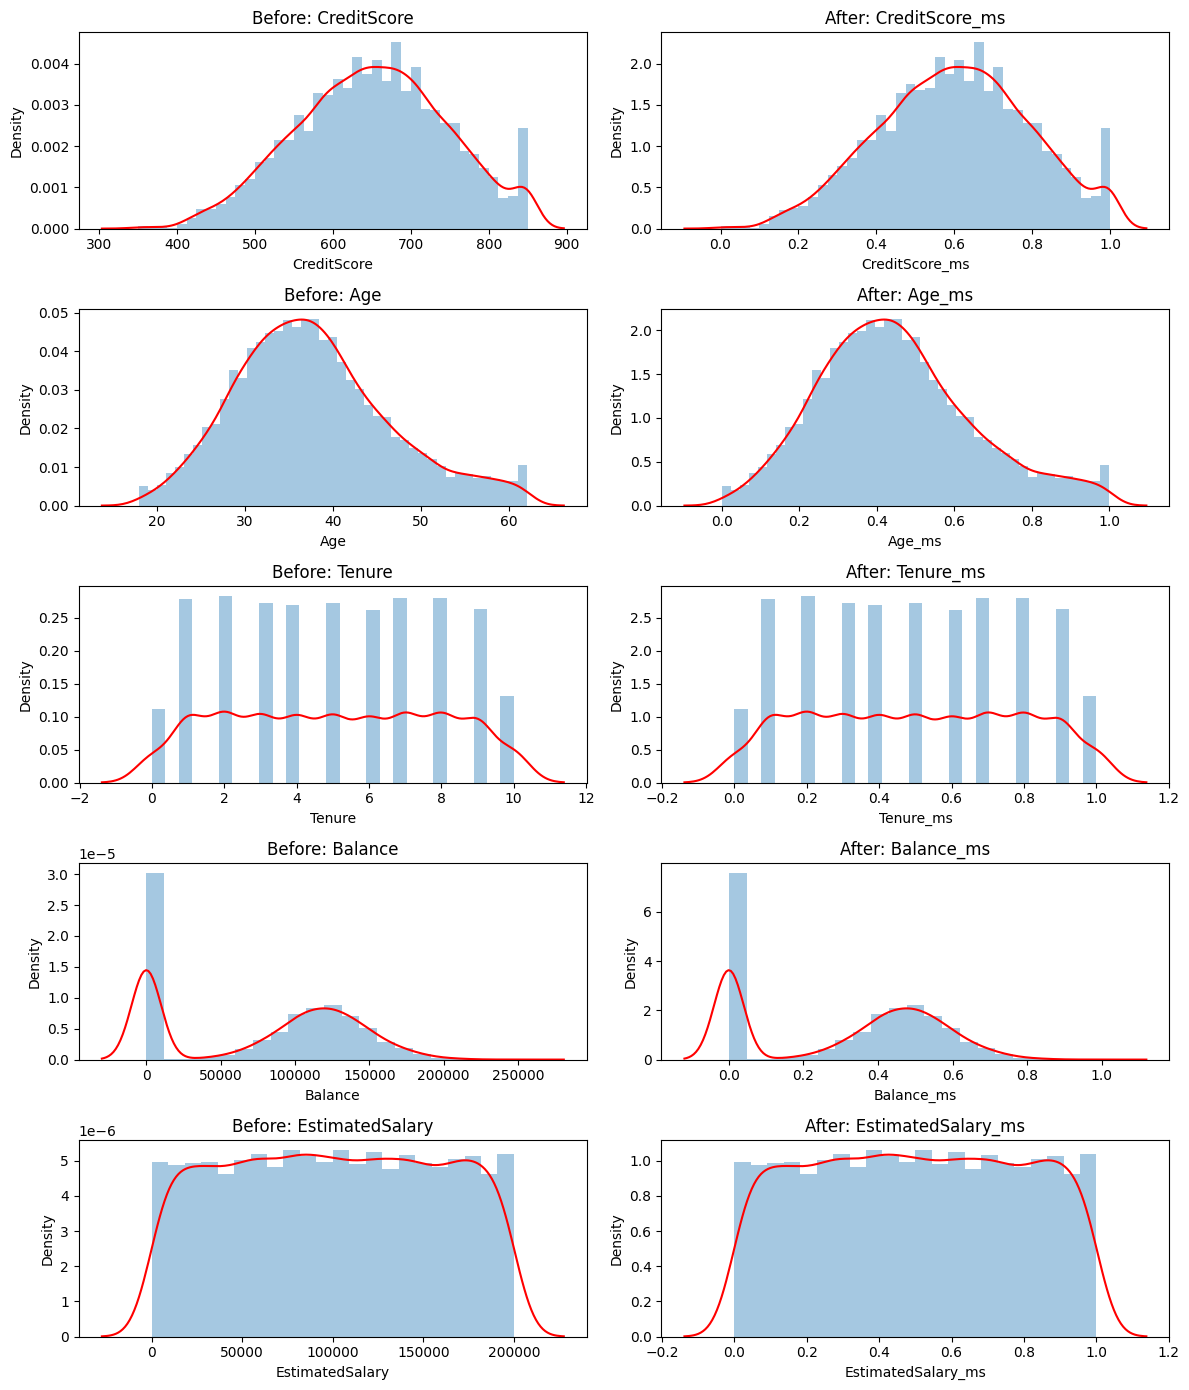

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 14))

features_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for i, feature in enumerate(features_to_plot):
    plt.subplot(len(features_to_plot), 2, 2*i + 1)
    plt.title(f"Before: {feature}")
    sns.distplot(data[feature], kde=True, kde_kws={"color": "red"})
    
    plt.subplot(len(features_to_plot), 2, 2*i + 2)
    plt.title(f"After: {feature}_ms")
    sns.distplot(data[feature + '_ms'], kde=True, kde_kws={"color": "red"})

plt.tight_layout()
plt.show()


# Feature Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
ms = MinMaxScaler()

In [28]:
ms.fit(data[['CreditScore','Age','Tenure',  'Balance', 'EstimatedSalary']])

MinMaxScaler()

In [29]:
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = ms.transform(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

In [30]:
data.drop(['CreditScore_ms', 'Age_ms', 'Tenure_ms', 'Balance_ms', 'EstimatedSalary_ms'], axis=1, inplace=True)


In [31]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000,9641.000000
mean,0.600575,0.449812,0.501535,0.305146,1.530962,0.705217,0.503164,0.500852,0.203713
std,0.193384,0.200071,0.288888,0.248713,0.581617,0.455969,0.500016,0.287589,0.402779
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.466000,0.318182,0.300000,0.000000,1.000000,0.000000,0.000000,0.255532,0.000000
50%,0.604000,0.431818,0.500000,0.387880,1.000000,1.000000,1.000000,0.501610,0.000000
75%,0.734000,0.568182,0.700000,0.508814,2.000000,1.000000,1.000000,0.747307,0.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])

data['Geography']


0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 9641, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [35]:
features = ['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 
            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
targets = 'Exited'

feature = data[features]  # Features
target = data[targets]    # Target


In [36]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [39]:
# Verify shapes of the split datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(7712, 9) (7712,)
(1929, 9) (1929,)


In [40]:
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.815966822187662


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV for hyperparameter tuning
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

# Predict using the best Random Forest model
y_pred_rf = rf_grid_search.best_estimator_.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 0.847071021254536
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1523
           1       0.72      0.44      0.55       406

    accuracy                           0.85      1929
   macro avg       0.79      0.70      0.73      1929
weighted avg       0.84      0.85      0.83      1929



In [44]:
# --- Gradient Boosting Model ---
# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Use GridSearchCV for hyperparameter tuning
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)

# Predict using the best Gradient Boosting model
y_pred_gb = gb_grid_search.best_estimator_.predict(X_test)

# Evaluate the Gradient Boosting model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Gradient Boosting Accuracy: 0.8564022809745983
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1523
           1       0.76      0.46      0.58       406

    accuracy                           0.86      1929
   macro avg       0.82      0.71      0.74      1929
weighted avg       0.85      0.86      0.84      1929



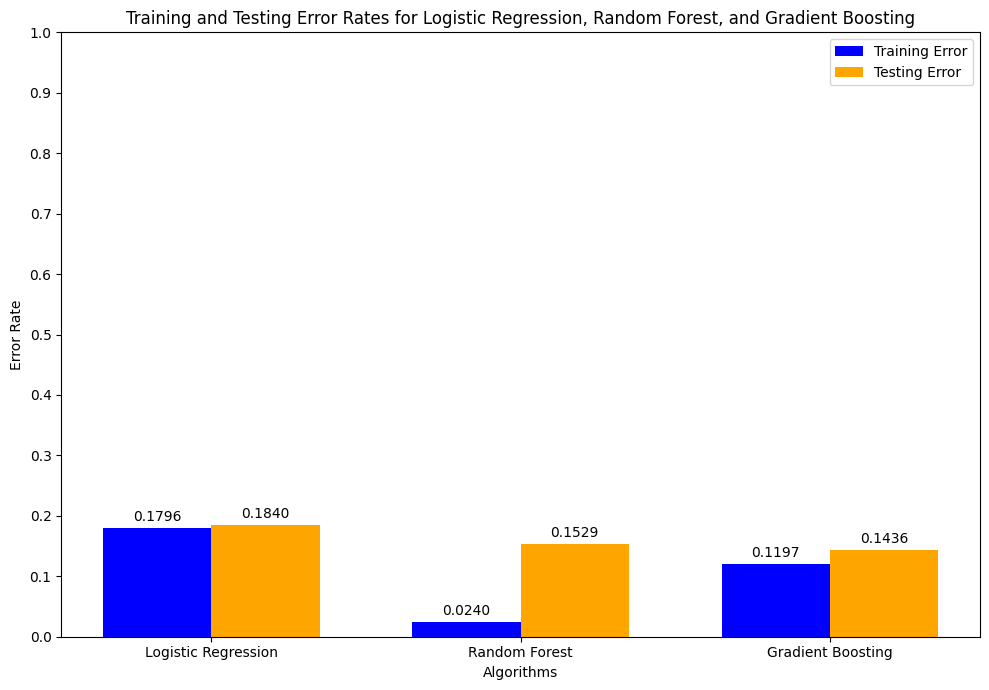

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Train and evaluate Logistic Regression
lr_train_accuracy = model.score(X_train, y_train)
lr_test_accuracy = accuracy_score(y_test, y_pred)

# Train and evaluate Random Forest
rf_train_accuracy = rf_grid_search.best_estimator_.score(X_train, y_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)

# Train and evaluate Gradient Boosting
gb_train_accuracy = gb_grid_search.best_estimator_.score(X_train, y_train)
gb_test_accuracy = accuracy_score(y_test, y_pred_gb)

# Convert accuracy to error rates (1 - accuracy)
lr_train_error = 1 - lr_train_accuracy
lr_test_error = 1 - lr_test_accuracy
rf_train_error = 1 - rf_train_accuracy
rf_test_error = 1 - rf_test_accuracy
gb_train_error = 1 - gb_train_accuracy
gb_test_error = 1 - gb_test_accuracy

# Prepare the data for the bar plot
algorithms = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
train_errors = [lr_train_error, rf_train_error, gb_train_error]
test_errors = [lr_test_error, rf_test_error, gb_test_error]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Position for bars
index = np.arange(len(algorithms))
bar_width = 0.35

# Plotting the bars
bar1 = ax.bar(index, train_errors, bar_width, label='Training Error', color='blue')
bar2 = ax.bar(index + bar_width, test_errors, bar_width, label='Testing Error', color='orange')

# Adding labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Error Rate')
ax.set_title('Training and Testing Error Rates for Logistic Regression, Random Forest, and Gradient Boosting')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(algorithms)
ax.legend()

# Adding the number line
ax.set_ylim(0, 1)  # Error rates range from 0 to 1
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adding number line at 0.1 intervals

# Function to add labels above the bars
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',  # Format the value with 4 decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", 
                    ha='center', va='bottom')

# Adding labels to the bars
add_labels(bar1, ax)
add_labels(bar2, ax)

# Display the plot
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd
import numpy as np

# Choose a few random indices for prediction examples (you can change these indices as needed)
random_indices = np.random.choice(X_test.index, size=5, replace=False)
sample_data = X_test.loc[random_indices]

lr_predictions = model.predict(sample_data)
rf_predictions = rf_grid_search.best_estimator_.predict(sample_data)
gb_predictions = gb_grid_search.best_estimator_.predict(sample_data)

def convert_to_label(predictions):
    return ["Exited" if pred == 1 else "Not Exited" for pred in predictions]

lr_predictions_labels = convert_to_label(lr_predictions)
rf_predictions_labels = convert_to_label(rf_predictions)
gb_predictions_labels = convert_to_label(gb_predictions)

# Combine predictions into a DataFrame for better visualization
predictions_df = pd.DataFrame({
    'Index': random_indices,
    'Logistic Regression': lr_predictions_labels,
    'Random Forest': rf_predictions_labels,
    'Gradient Boosting': gb_predictions_labels
})

# Display the DataFrame as a table
print(predictions_df.to_markdown(index=False))


|   Index | Logistic Regression   | Random Forest   | Gradient Boosting   |
|--------:|:----------------------|:----------------|:--------------------|
|    4884 | Exited                | Exited          | Exited              |
|    5009 | Not Exited            | Not Exited      | Not Exited          |
|    5584 | Not Exited            | Not Exited      | Not Exited          |
|    9875 | Not Exited            | Not Exited      | Not Exited          |
|    9044 | Not Exited            | Exited          | Exited              |
